In [1]:
import __init__

In [2]:
import cv2
import os
import time

import matplotlib.pyplot as plt
from faceapi import FaceAPIManager
import torch

In [3]:
face_api_manager = FaceAPIManager(
    detector_model_path=r'C:\Users\jeffg\face-project\face-api\model_weights\face-yolov8-m.pt',
    encoder_model_path=r'C:\Users\jeffg\face-project\face-api\model_weights\feifei_face.pt',
    emotion_model_path=r"C:\Users\jeffg\face-project\face-api\model_weights\face-emotion.pth",
    
    age_proto_path = r'C:\Users\jeffg\face-project\face-api\model_weights\age_gender_models\age_detector\age_deploy.prototxt', 
    age_model_path = r'C:\Users\jeffg\face-project\face-api\model_weights\age_gender_models\age_detector\age_net.caffemodel', 
    gender_proto_path = r'C:\Users\jeffg\face-project\face-api\model_weights\age_gender_models\gender_detector\gender_deploy.prototxt', 
    gender_model_path = r'C:\Users\jeffg\face-project\face-api\model_weights\age_gender_models\gender_detector\gender_net.caffemodel', 

    device='cuda'
)

# reid_encoder = FastReIDInterface(
#     r'..\package\botsort\fast_reid\configs\MOT17\sbs_S50.yml', 
#     r'..\package\botsort\reid_model\mot17_sbs_S50.pth', 
#     face_api_manager._encoder._devie
# )

loaded finetune model , output to 8


In [4]:
# openvino emotion 待完成
# openvino_face_api_manager = FaceAPIManager(
#     detector_model_path='model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml',
#     encoder_model_path='model_weights/feifei_face_openvino_model/feifei_face.xml',
#     device='GPU'
# )

# reid_encoder = FastReIDInterface(
#     r'..\package\botsort\fast_reid\configs\MOT17\sbs_S50.yml', 
#     r'..\package\botsort\reid_model\mot17_sbs_S50.pth', 
#     face_api_manager._encoder._devie
# )

WARNING ⚠️ imgsz=[865, 1536] must be multiple of max stride 32, updating to [896, 1536]
!!!  [[     955.12      104.82      1170.9      400.85     0.90373           0]
 [     828.91      524.91      1076.1      864.92     0.89697           0]
 [     653.99      74.799      884.67      423.39     0.89533           0]
 [     40.123      495.81      297.08      861.74     0.89207           0]
 [     382.48      419.55      706.12      844.83     0.89084           0]
 [     360.19       77.93      582.18      386.42     0.88929           0]
 [     1240.2      415.84        1521       849.9     0.88478           0]
 [     30.346      61.758      275.59      394.48     0.88343           0]
 [     1257.7      55.713      1480.8      375.31     0.86641           0]]
undersecretary 0.82654965
undersecretary 0.9712649
joneshong 0.48930162
undersecretary 0.54849404
director 0.91563725
director 0.9163043
undersecretary 0.51263356
director 0.6909836
director 0.40938535


3.316988468170166

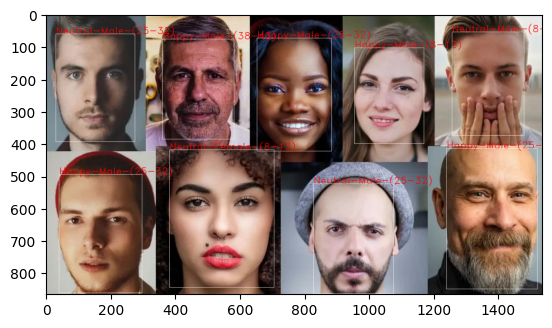

In [5]:
# img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
img_file = r'C:\Users\jeffg\face-project\face-api\data\test.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'


img = cv2.imread(img_file, cv2.IMREAD_COLOR)#[..., ::-1]
display_img = img.copy()


st = time.time()
faces = face_api_manager.handle(img, conf=0.5)
for face in faces:
    pred_idx = face.embedding.argmax()
    pred_prob = face.embedding[pred_idx]
    print({
       v: k
       for k , v in face_api_manager._encoder.class_to_idx.items()
    }[pred_idx], pred_prob)
    
    x1,y1,x2,y2  = face.xyxy  
    #reid = reid_encoder.inference(img, np.array(face.xyxy)[None]).ravel()
    cv2.putText(display_img, f"%s-%s-%s"%(face.emotion, face.gender, face.age), (x1, y1),
                cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
    
#embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img[..., ::-1])

cost = time.time() -st
cost

In [6]:
# 如果是以embedding 來比較

In [7]:
# from sklearn.metrics.pairwise import cosine_similarity
# from IPython import display
# import numpy as np

# img_dir = r'C:\Users\jeffg\face-project\facenet-pytorch\data\barai-data_cropped'
# for label in os.listdir(img_dir):
    
#     train_label_similarity_list = []
#     for train_img_path in os.listdir(os.path.join(img_dir, label)):
#         img = cv2.imread(os.path.join(img_dir, label, train_img_path), cv2.IMREAD_COLOR)[..., ::-1]
#         training_faces = face_api_manager.handle(img, conf=0.5)
#         if len(training_faces) > 0:
#             training_face = training_faces[0]
#             similarity = cosine_similarity(face.embedding[None], training_face.embedding[None])
#             train_label_similarity_list.append(similarity[0][0])
            
#     print('label : ', label) 
#     print("max s", max(train_label_similarity_list))

In [8]:
cap = cv2.VideoCapture(0)

In [9]:
while 1:
    d, frame = cap.read()
    if not d:
        print('no image')
        break

    display_frame = frame.copy()
    faces = face_api_manager.handle(frame, conf=0.5)
    for face in faces:
        
        pred_idx = face.embedding.argmax()
        # 如果爆掉，很大原因是因為不是finetune model
        pred_prob = face.embedding[pred_idx]
        label = {
           v: k
           for k , v in face_api_manager._encoder.class_to_idx.items()
        }[pred_idx]
        
        #print(label, pred_prob)
        x1,y1,x2,y2  = face.xyxy  

        cv2.putText(display_frame, f"%s-%s-%s, %s - %.2f"%(face.emotion,  face.gender, face.age, label, pred_prob), (x1, y1),
                    cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))
        cv2.rectangle(display_frame, ( x1,y1), (x2,y2), (255, 255, 255))
    
    cv2.imshow("camera", display_frame)

    
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('q'):  # q to quit
        print('Quit')
        break
        
cv2.destroyAllWindows()
cap.release()

!!!  []
!!!  [[   0.014084      151.17       67.97      314.39     0.76112           0]]
!!!  [[   0.083382      150.78      78.377      313.44     0.79021           0]]
!!!  [[   0.060043      147.19      95.157      312.92      0.8399           0]]
!!!  [[    0.31161       148.6      119.12      312.75     0.85195           0]]
!!!  [[     24.928      144.94      153.23      313.56     0.84805           0]]
!!!  [[     32.138      144.75      162.33      314.38      0.8596           0]]
!!!  [[     32.138      144.75      162.33      314.38      0.8596           0]]
!!!  [[     41.926      146.06      173.06      316.31     0.85131           0]]
!!!  [[      50.78       145.7       183.3       315.1     0.85546           0]]
!!!  [[     60.699      147.09      193.94      315.95     0.86471           0]]
!!!  [[     62.385      145.38       199.5      315.77      0.8591           0]]
!!!  [[     68.686      147.45      203.53      315.35     0.86555           0]]
!!!  [[     69.583  

# Export model to openvino

In [ ]:
# !pip install onnx==1.12.0
# !pip install -q onnxruntime==1.17.0

In [ ]:
# 會存在 .\model_weights 之下
face_api_manager._detector._model.export(format='openvino', dynamic=True, half=False)

# 用 Openvino 讀取

In [ ]:
from typing import Tuple
from ultralytics.utils import ops
import torch
import numpy as np


def letterbox(img: np.ndarray, new_shape:Tuple[int, int] = (640, 640), color:Tuple[int, int, int] = (114, 114, 114), auto:bool = False, scale_fill:bool = True, scaleup:bool = False, stride:int = 32):
    """
    Resize image and padding for detection. Takes image as input, 
    resizes image to fit into new shape with saving original aspect ratio and pads it to meet stride-multiple constraints
    
    Parameters:
      img (np.ndarray): image for preprocessing
      new_shape (Tuple(int, int)): image size after preprocessing in format [height, width]
      color (Tuple(int, int, int)): color for filling padded area
      auto (bool): use dynamic input size, only padding for stride constrins applied
      scale_fill (bool): scale image to fill new_shape
      scaleup (bool): allow scale image if it is lower then desired input size, can affect model accuracy
      stride (int): input padding stride
    Returns:
      img (np.ndarray): image after preprocessing
      ratio (Tuple(float, float)): hight and width scaling ratio
      padding_size (Tuple(int, int)): height and width padding size
    
    
    """
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scale_fill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)


def preprocess_image(img0: np.ndarray):
    """
    Preprocess image according to YOLOv8 input requirements. 
    Takes image in np.array format, resizes it to specific size using letterbox resize and changes data layout from HWC to CHW.
    
    Parameters:
      img0 (np.ndarray): image for preprocessing
    Returns:
      img (np.ndarray): image after preprocessing
    """
    # resize
    img = letterbox(img0)[0]
    
    # Convert HWC to CHW
    img = img.transpose(2, 0, 1)
    img = np.ascontiguousarray(img)
    return img


def image_to_tensor(image:np.ndarray):
    """
    Preprocess image according to YOLOv8 input requirements. 
    Takes image in np.array format, resizes it to specific size using letterbox resize and changes data layout from HWC to CHW.
    
    Parameters:
      img (np.ndarray): image for preprocessing
    Returns:
      input_tensor (np.ndarray): input tensor in NCHW format with float32 values in [0, 1] range 
    """
    input_tensor = image.astype(np.float32)  # uint8 to fp32
    input_tensor /= 255.0  # 0 - 255 to 0.0 - 1.0
    
    # add batch dimension
    if input_tensor.ndim == 3:
        input_tensor = np.expand_dims(input_tensor, 0)
    return input_tensor


def postprocess(
    pred_boxes:np.ndarray, 
    input_hw:Tuple[int, int], 
    orig_img:np.ndarray, 
    min_conf_threshold:float = 0.25, 
    nms_iou_threshold:float = 0.7, 
    agnosting_nms:bool = False, 
    max_detections:int = 300,
    nc = 80
):
    """
    YOLOv8 model postprocessing function. Applied non maximum supression algorithm to detections and rescale boxes to original image size
    Parameters:
        pred_boxes (np.ndarray): model output prediction boxes
        input_hw (np.ndarray): preprocessed image
        orig_image (np.ndarray): image before preprocessing
        min_conf_threshold (float, *optional*, 0.25): minimal accepted confidence for object filtering
        nms_iou_threshold (float, *optional*, 0.45): minimal overlap score for removing objects duplicates in NMS
        agnostic_nms (bool, *optiona*, False): apply class agnostinc NMS approach or not
        max_detections (int, *optional*, 300):  maximum detections after NMS
    Returns:
       pred (List[Dict[str, np.ndarray]]): list of dictionary with det - detected boxes in format [x1, y1, x2, y2, score, label]
    """
    nms_kwargs = {"agnostic": agnosting_nms, "max_det":max_detections}
    preds = ops.non_max_suppression(
        torch.from_numpy(pred_boxes),
        min_conf_threshold,
        nms_iou_threshold,
        nc=nc,
        **nms_kwargs
    )

    results = []
    for i, pred in enumerate(preds):
        shape = orig_img[i].shape if isinstance(orig_img, list) else orig_img.shape
        if not len(pred):
            results.append({"det": [], "segment": []})
            continue
        pred[:, :4] = ops.scale_boxes(input_hw, pred[:, :4], shape).round()
        results.append({"det": pred})

    return results

In [ ]:
import openvino as ov

# Create OpenVINO Core object instance
core = ov.Core()

In [ ]:
import ipywidgets as widgets

device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value='AUTO',
    description='Device:',
    disabled=False,
)

device

In [ ]:
det_model_path = 'model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml'

In [ ]:
det_ov_model = core.read_model(det_model_path)
if device.value != "CPU":
    det_ov_model.reshape({0: [1, 3, 640, 640]})

In [ ]:
ov_config = {}
if "GPU" in device.value or ("AUTO" in device.value and "GPU" in core.available_devices):
    ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}
det_compiled_model = core.compile_model(det_ov_model, device.value, ov_config)

In [ ]:
img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
# img_file = r'data/feifei-face/gy/0541810.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'
img = cv2.imread(img_file)#
display_img = img.copy()

In [ ]:
def detect(image:np.ndarray, model:ov.Model):
    """
    OpenVINO YOLOv8 model inference function. Preprocess image, runs model inference and postprocess results using NMS.
    Parameters:
        image (np.ndarray): input image.
        model (Model): OpenVINO compiled model.
    Returns:
        detections (np.ndarray): detected boxes in format [x1, y1, x2, y2, score, label]
    """
    preprocessed_image = preprocess_image(image)
    input_tensor = image_to_tensor(preprocessed_image)
    result = model(input_tensor)
    boxes = result[model.output(0)]
    input_hw = input_tensor.shape[2:]
    detections = postprocess(pred_boxes=boxes, input_hw=input_hw, orig_img=image)
    return detections

In [ ]:
image = img

In [ ]:
preprocessed_image = preprocess_image(image)
input_tensor = image_to_tensor(preprocessed_image)
result = det_compiled_model(input_tensor)
boxes = result[det_compiled_model.output(0)]
input_hw = input_tensor.shape[2:]
detections = postprocess(pred_boxes=boxes, input_hw=input_hw, orig_img=image, nc=1)
detections

In [ ]:
%%timeit

preprocessed_image = preprocess_image(image)
input_tensor = image_to_tensor(preprocessed_image)
result = det_compiled_model(input_tensor)
boxes = result[det_compiled_model.output(0)]
input_hw = input_tensor.shape[2:]
detections = postprocess(pred_boxes=boxes, input_hw=input_hw, orig_img=image, nc=1)
detections

In [ ]:
detections

In [ ]:
det = detections[0]['det'].numpy()

In [ ]:
dis_img = img.copy()

In [ ]:
for face in det:
    x1,y1,x2,y2  = face[:4].astype(int)
    cv2.rectangle(dis_img, ( x1,y1), (x2,y2), (255, 255, 255))

In [ ]:
plt.imshow(dis_img[..., ::-1])

In [ ]:
# img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\5\64fbf58066959c5cc995539e-371-12697.png'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'


img = cv2.imread(img_file, cv2.IMREAD_COLOR)#[..., ::-1]
display_img = cv2.resize(img.copy(), (640,640))


st = time.time()
faces = openvino_face_api_manager.handle(img, conf=0.5)
for face in faces:
    pred_idx = face.embedding.argmax()
    pred_prob = face.embedding[pred_idx]
    print({
       v: k
       for k , v in openvino_face_api_manager._encoder.class_to_idx.items()
    }[pred_idx], pred_prob)
    
    x1,y1,x2,y2  = face.xyxy  

    o_w, o_h= img.shape[:2]

    w_ratio = 640/o_w
    h_ratio = 640/o_h

    x1 = int(x1 * h_ratio)
    x2 = int(x2 * h_ratio)
    
    #reid = reid_encoder.inference(img, np.array(face.xyxy)[None]).ravel()
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
    break
#embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img[..., ::-1])

cost = time.time() -st
cost

# embedding model

In [ ]:
face_api_manager._encoder._model.eval()

In [ ]:
embedding_model_file_name = os.path.basename(face_api_manager._encoder._model_path)
model_weight_path = os.path.dirname(face_api_manager._encoder._model_path)

embedding_onnx_model_file_name = embedding_model_file_name.replace('.pt', '.onnx')

In [ ]:
onnx_path = os.path.join(model_weight_path, embedding_onnx_model_file_name)

In [ ]:
dummy_input = face_api_manager._encoder.preprocess([ cv2.imread(img_file, cv2.IMREAD_COLOR)])

In [ ]:
torch.onnx.export(
    face_api_manager._encoder._model,
    dummy_input,
    onnx_path,
    export_params=True, 
      do_constant_folding=True,  # whether to execute constant folding for optimization
      input_names = ['input'],   # the model's input names
      output_names = ['output'], # the model's output names
      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                    'output' : {0 : 'batch_size'}}
)
print(f"ONNX model exported to {onnx_path}.")

In [ ]:
ov_model = ov.convert_model(onnx_path)
# ov.save_model(ov_model, ir_path)

In [ ]:
openvino_model_dir_path = onnx_path.replace('.onnx', '_openvino_model')

In [ ]:
if not os.path.isdir(openvino_model_dir_path):
    os.makedirs(openvino_model_dir_path)

In [ ]:
openvino_model_dir_path

In [ ]:
ir_path = os.path.join(openvino_model_dir_path, embedding_onnx_model_file_name.replace('.onnx', '.xml'))
meta_path = os.path.join(openvino_model_dir_path, embedding_onnx_model_file_name.replace('.onnx', '.meta'))

In [ ]:
ov.save_model(ov_model, ir_path)

In [ ]:
ir_path

In [ ]:
embedding_onnx_model_file_name

In [ ]:
import json

In [ ]:
with open(meta_path, 'w') as writer:
    writer.write(json.dumps(face_api_manager._encoder._model.class_to_idx))

In [ ]:
meta_path

# 測試

In [ ]:
import ipywidgets as widgets

device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value='AUTO',
    description='Device:',
    disabled=False,
)

device

In [ ]:
# Load the network in OpenVINO Runtime.
core = ov.Core()
model_ir = core.read_model(model='model_weights/feifei_face_openvino_model/feifei_face.xml')


meta_path = 'model_weights/feifei_face_openvino_model/feifei_face.meta'
with open(meta_path, 'r') as reader:
    meta_data = json.loads(reader.read())
    



compiled_model_ir = core.compile_model(model=model_ir, device_name=device.value)

In [ ]:
# Get input and output layers.
output_layer_ir = compiled_model_ir.output(0)

In [ ]:
meta_data

In [ ]:
img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
# img_file = r'data/feifei-face/gy/0541810.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)#
display_img = img.copy()

In [ ]:
st = time.time()
faces = face_api_manager.handle(img, conf=0.5)
for face in faces:
    pred_idx = face.embedding.argmax()
    pred_prob = face.embedding[pred_idx]
    print({
       v: k
       for k , v in face_api_manager._encoder._model.class_to_idx.items()
    }[pred_idx], pred_prob)
    
    x1,y1,x2,y2  = face.xyxy  
    x1,y1,x2,y2  = face.xyxy
    face_img = img[y1:y2,x1:x2,:]
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
#embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img[..., ::-1])

cost = time.time() -st
cost

In [ ]:
import torch

In [ ]:

face_img_list = [face_img]

In [ ]:
normalized_input_image = torch.stack([face_api_manager._encoder.transform(im) for im in face_img_list]).numpy()

In [ ]:
# normalized_input_image = face_api_manager._encoder.transform(face_img)[None].numpy()

In [ ]:
res_ir = compiled_model_ir(normalized_input_image)[output_layer_ir]

In [ ]:
res_ir

In [ ]:
pred_idx = res_ir.argmax()
pred_prob = res_ir[pred_idx]

In [ ]:
{
       v: k
       for k , v in face_api_manager._encoder._model.class_to_idx.items()
    }[pred_idx]